In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Importing DFs

In [169]:
bgg = pd.read_csv("data/bgg_modified.csv")

bgg

,rank,rating,name,year,minplayers,maxplayers,bestplayers,minplaytime,maxplaytime,minage,type
0,1,8.5,Gloomhaven,2017,1,4,3,60,120,14,Strategy
1,2,8.4,Pandemic Legacy: Season 1,2015,2,4,4+,60,60,13,Strategy
2,3,8.4,Brass: Birmingham,2018,2,4,3,60,120,14,Strategy
3,4,8.3,Terraforming Mars,2016,1,5,3,120,120,12,Strategy
4,5,8.3,Twilight Imperium: Fourth Edition,2017,3,6,4+,240,480,14,Strategy
...,...,...,...,...,...,...,...,...,...,...,...
95,96,7.5,The Isle of Cats,2019,1,4,3,60,90,8,Strategy
96,97,7.5,Russian Railroads,2013,2,4,4+,90,120,12,Strategy
97,98,7.5,Tigris & Euphrates,1997,2,4,4+,90,90,12,Strategy
98,99,7.5,Decrypto,2018,3,8,4+,15,45,12,Party


In [170]:
top_ten = pd.read_csv("data/top_ten_modified.csv")

top_ten

,game_name,num_players,value,num_votes
0,Gloomhaven,1,Best,143
1,Gloomhaven,1,Recommended,643
2,Gloomhaven,1,Not Recommended,356
3,Gloomhaven,2,Best,373
4,Gloomhaven,2,Recommended,822
...,...,...,...,...
169,War of the Ring,4+,Recommended,125
170,War of the Ring,4+,Not Recommended,198
171,War of the Ring,4+,Best,1
172,War of the Ring,4+,Recommended,3


## Distribution of Game release

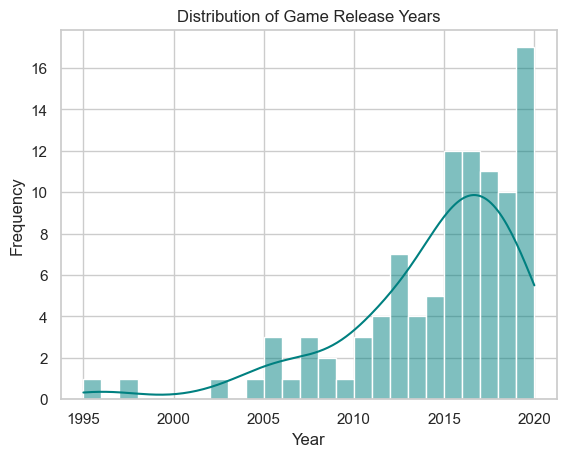

In [280]:
filtered_data = bgg[(bgg['year'] >= 1995) & (bgg['year'] <= 2020)]

sns.set(style="whitegrid")

sns.histplot(filtered_data['year'], kde=True, bins=25, color="teal")

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Game Release Years')

release_distribution = "release_years.png"
plt.savefig(f"images/{release_distribution}")

plt.show()

## Distribution of Game types

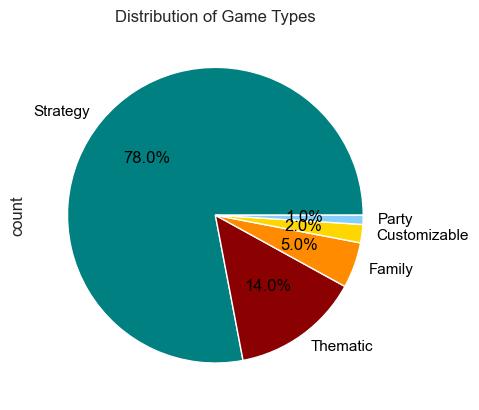

In [281]:
type_counts = bgg['type'].value_counts()

type_counts.plot(kind='pie', autopct='%1.1f%%', colors=["teal", "darkred", "darkorange", "gold",  "lightskyblue"], textprops={'color': 'black'})

plt.title('Distribution of Game Types')

type_distribution = "type_distribution.png"
plt.savefig(f"images/{type_distribution}")

plt.show()

## Average min Age by Game Type

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\3742702342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='minage', data=average_minage_by_type, palette=custom_colors)


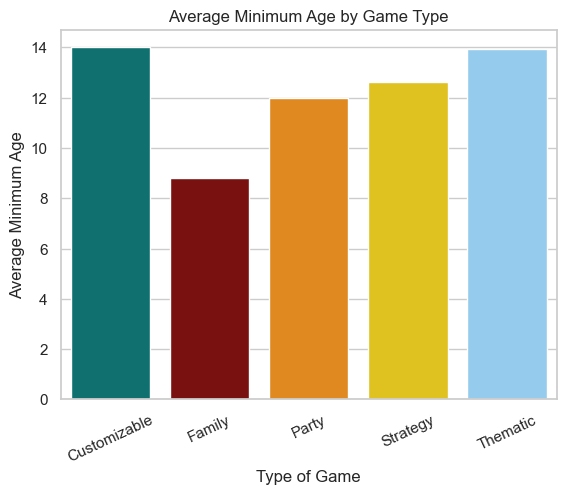

In [293]:
custom_colors = ["teal", "darkred", "darkorange", "gold", "lightskyblue"]

average_minage_by_type = bgg.groupby('type')['minage'].mean().reset_index()

sns.barplot(x='type', y='minage', data=average_minage_by_type, palette=custom_colors)

plt.xlabel('Type of Game')
plt.ylabel('Average Minimum Age')
plt.title('Average Minimum Age by Game Type')

plt.xticks(rotation=25)

age_type = "age_type.png"
plt.savefig(f"images/{age_type}", bbox_inches = 'tight')

plt.show()

## Top ten by rating

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\1576946369.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='rating', data=top_ten_games, palette=custom_colors)


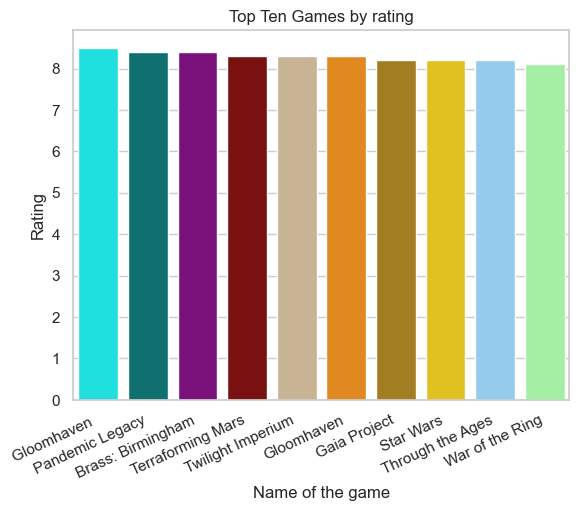

In [292]:
def reducing_names (df):
    df['name'] = df.apply(lambda row: row['name'].split(':')[0] if row['name'] != 'Brass: Birmingham' else row['name'], axis=1)
# Because the graph is hard to read with large names, I'm going to reduce the name of the games reusing the function that I
#created in the cleaning process with the second table, changing the name of the column, that in this case is "game", not game_name

reducing_names(bgg)    

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

top_ten_games = bgg.sort_values(by='rank').head(10)

sns.barplot(x='name', y='rating', data=top_ten_games, palette=custom_colors)

plt.xlabel('Name of the game')
plt.ylabel('Rating')
plt.title('Top Ten Games by rating')

plt.xticks(rotation=25, ha='right')

top_rating = "top_rating.png"
plt.savefig(f"images/{top_rating}.png", bbox_inches = 'tight')


plt.show()

## Top 10 by Total Votes

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\2957322029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_votes.index, y=total_votes.values, palette=custom_colors)
C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\2957322029.py:6: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=total_votes.index, y=total_votes.values, palette=custom_colors)


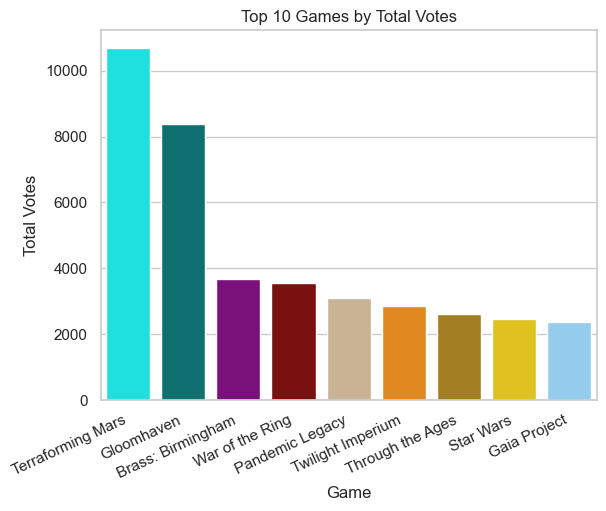

In [294]:

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

total_votes = top_ten.groupby('game_name')['num_votes'].sum().sort_values(ascending=False)


sns.barplot(x=total_votes.index, y=total_votes.values, palette=custom_colors)

plt.xlabel('Game')
plt.ylabel('Total Votes')
plt.title('Top 10 Games by Total Votes')

plt.xticks(rotation=25, ha='right')

top_votes = "top_votes.png"
plt.savefig(f"images/{top_votes}", bbox_inches = 'tight')

plt.show()

## Best game for 1 Player

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\3198949751.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_votes_one['game_name'], y=total_votes_one['num_votes'], palette=custom_colors)
C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\3198949751.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=total_votes_one['game_name'], y=total_votes_one['num_votes'], palette=custom_colors)


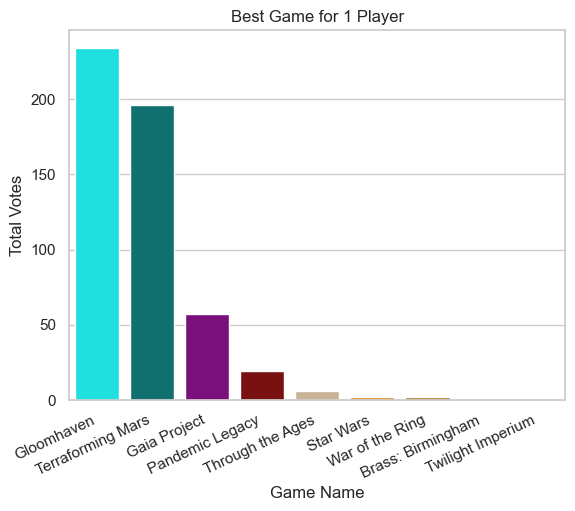

In [295]:

one_best = top_ten[(top_ten['num_players'] == '1') & (top_ten['value'] == 'Best')].copy()

total_votes_one = one_best.groupby('game_name')['num_votes'].agg('sum').reset_index()

total_votes_one['num_votes'] = total_votes_one['num_votes'].astype(int)

total_votes_one = total_votes_one.sort_values(by='num_votes', ascending=False)

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

sns.barplot(x=total_votes_one['game_name'], y=total_votes_one['num_votes'], palette=custom_colors)

plt.xlabel('Game Name')
plt.ylabel('Total Votes')
plt.title('Best Game for 1 Player')

plt.xticks(rotation=25, ha='right')

one_player = "one_player.png"
plt.savefig(f"images/{one_player}", bbox_inches = 'tight')

plt.show()


## Best game for 2 Players

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\3972071363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)
C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\3972071363.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)


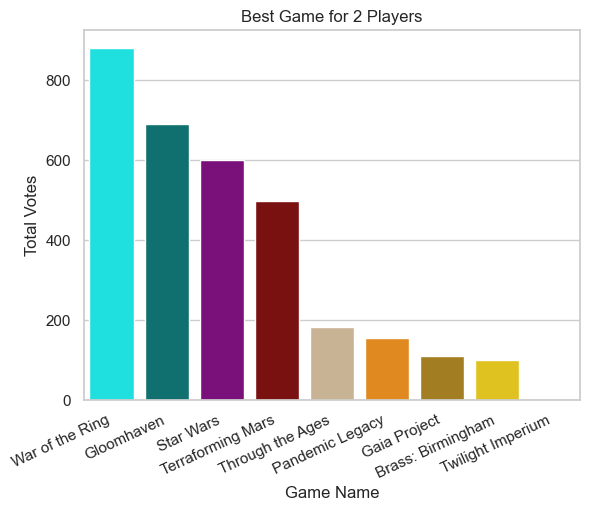

In [296]:

two_best = top_ten[(top_ten['num_players'] == '2') & (top_ten['value'] == 'Best')].copy()

total_votes_two = two_best.groupby('game_name')['num_votes'].agg('sum').reset_index()

total_votes_two['num_votes'] = total_votes_two['num_votes'].astype(int)

total_votes_two = total_votes_two.sort_values(by='num_votes', ascending=False)

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)

plt.xlabel('Game Name')
plt.ylabel('Total Votes')
plt.title('Best Game for 2 Players')

plt.xticks(rotation=25, ha='right')

two_players = "two_players.png"
plt.savefig(f"images/{two_players}", bbox_inches = 'tight')

plt.show()

## Best game for 3 Players

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\124655139.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)
C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\124655139.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)


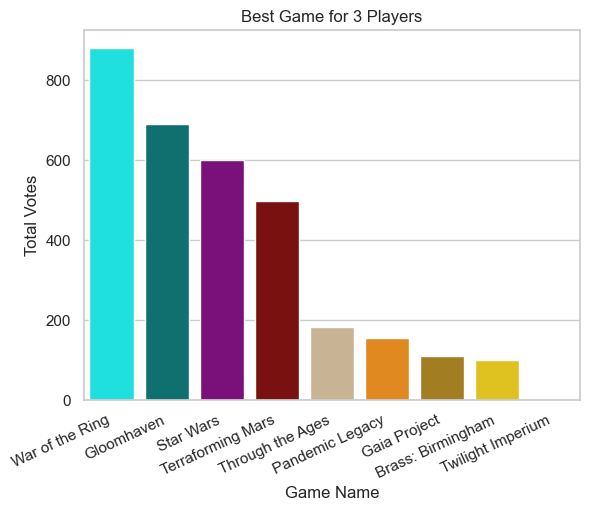

In [297]:

three_best = top_ten[(top_ten['num_players'] == '3') & (top_ten['value'] == 'Best')].copy()

total_votes_three = three_best.groupby('game_name')['num_votes'].agg('sum').reset_index()

total_votes_three['num_votes'] = total_votes_three['num_votes'].astype(int)

total_votes_three = total_votes_three.sort_values(by='num_votes', ascending=False)

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

sns.barplot(x=total_votes_two['game_name'], y=total_votes_two['num_votes'], palette=custom_colors)

plt.xlabel('Game Name')
plt.ylabel('Total Votes')
plt.title('Best Game for 3 Players')

plt.xticks(rotation=25, ha='right')

three_players = "three_players.png"
plt.savefig(f"images/{three_players}", bbox_inches = 'tight')

plt.show()

## Best game for 4 or more Players

C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\2783273777.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=four_best['game_name'], y=four_best['num_votes'], palette=custom_colors)
C:\Users\yoith\AppData\Local\Temp\ipykernel_15268\2783273777.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=four_best['game_name'], y=four_best['num_votes'], palette=custom_colors)


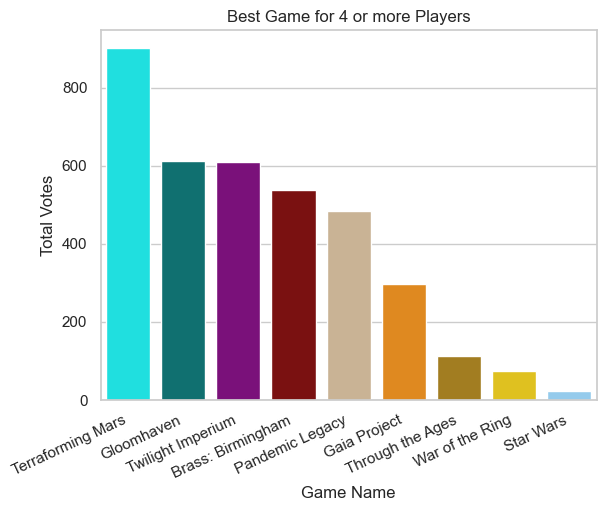

In [298]:

four_best = top_ten[(top_ten['num_players'] == '4+') & (top_ten['value'] == 'Best')].copy()

four_best = four_best.groupby('game_name')['num_votes'].agg('sum').reset_index()

four_best['num_votes'] = four_best['num_votes'].astype(int)

four_best = four_best.sort_values(by='num_votes', ascending=False)

custom_colors = ["cyan", "teal", "darkmagenta", "darkred", "tan", "darkorange", "darkgoldenrod", "gold", "lightskyblue", "palegreen"]

sns.barplot(x=four_best['game_name'], y=four_best['num_votes'], palette=custom_colors)

plt.xlabel('Game Name')
plt.ylabel('Total Votes')
plt.title('Best Game for 4 or more Players')

plt.xticks(rotation=25, ha='right')

four_players = "four_players.png"
plt.savefig(f"images/{four_players}", bbox_inches = 'tight')

plt.show()